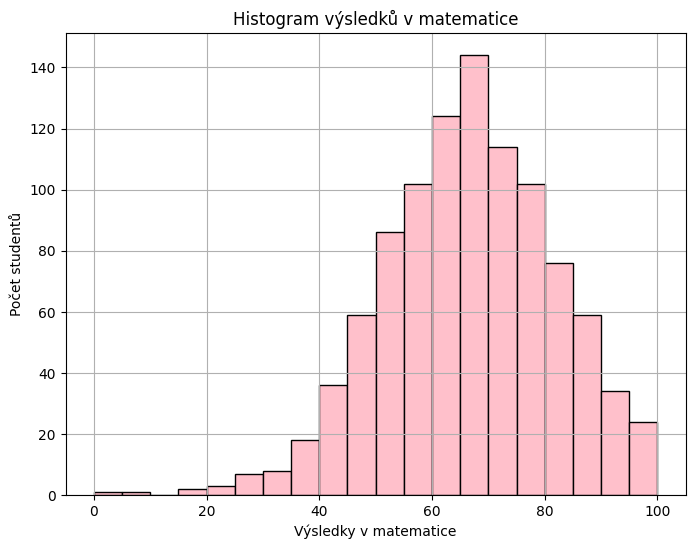

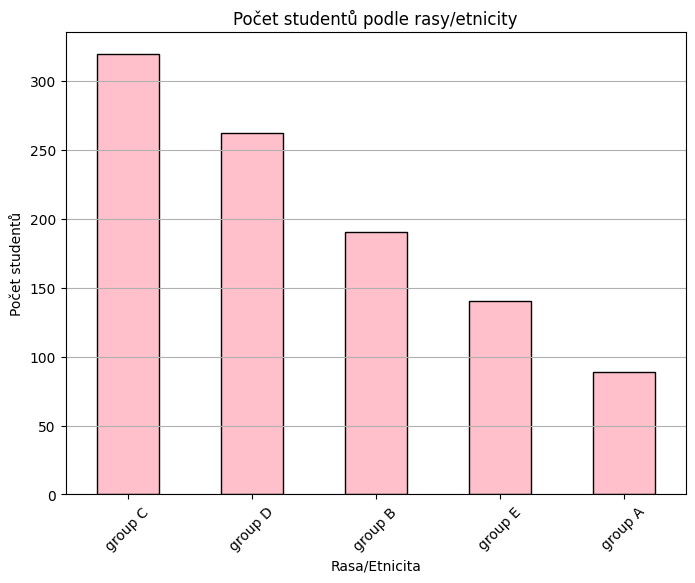

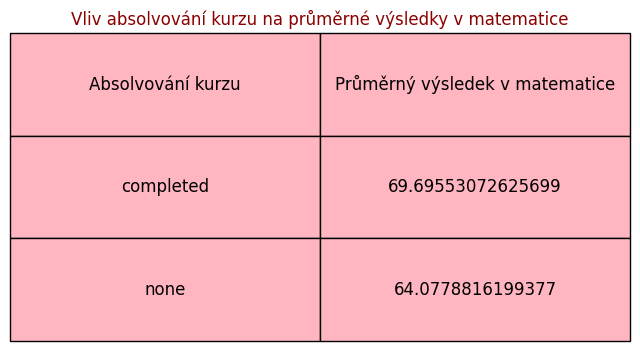

C:\Users\filip\AppData\Local\Temp\ipykernel_13760\103118295.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agregace_df = agregace_df.groupby('parental_level_of_education').mean().reset_index()


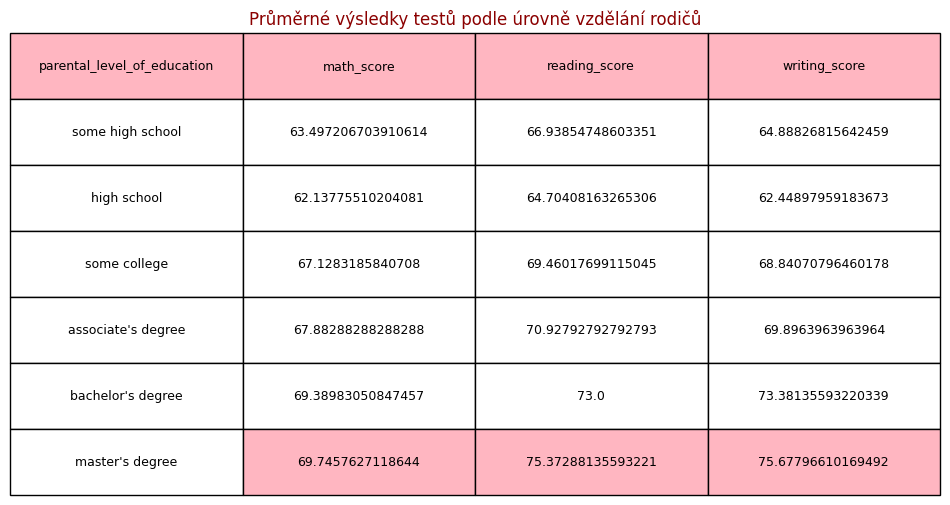

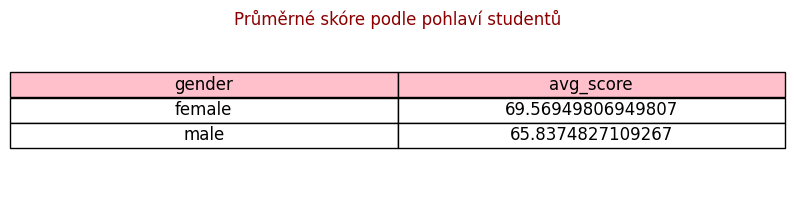

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# url = https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

df = pd.read_csv('study_performance.csv')

# Histogram výsledků v matematice
plt.figure(figsize=(8, 6))
plt.hist(df['math_score'], bins=20, color='pink', edgecolor='black')
plt.title('Histogram výsledků v matematice')
plt.xlabel('Výsledky v matematice')
plt.ylabel('Počet studentů')
plt.grid(True)
plt.show()

# Počet studentů podle rasy/etnicity
plt.figure(figsize=(8, 6))
df['race_ethnicity'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Počet studentů podle rasy/etnicity')
plt.xlabel('Rasa/Etnicita')
plt.ylabel('Počet studentů')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Vliv absolvování kurzu na průměrné výsledky v matematice
matematika_podle_kurzu = df.groupby('test_preparation_course')['math_score'].mean().reset_index()
matematika_podle_kurzu.columns = ['Absolvování kurzu', 'Průměrný výsledek v matematice']

plt.figure(figsize=(8, 4))
table = plt.table(cellText=matematika_podle_kurzu.values,
                  colLabels=matematika_podle_kurzu.columns,
                  cellLoc='center',
                  loc='center',
                  cellColours=[['lightpink', 'lightpink'], ['lightpink', 'lightpink']],
                  colColours=['lightpink', 'lightpink'],
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.axis('off')
plt.title('Vliv absolvování kurzu na průměrné výsledky v matematice', fontsize=12, color='darkred')
plt.show()


# Průměrné výsledky testů podle úrovně vzdělání rodičů
agregace_df = df[['parental_level_of_education', 'math_score', 'reading_score', 'writing_score']].copy()

agregace_df['math_score'] = pd.to_numeric(agregace_df['math_score'], errors='coerce')
agregace_df['reading_score'] = pd.to_numeric(agregace_df['reading_score'], errors='coerce')
agregace_df['writing_score'] = pd.to_numeric(agregace_df['writing_score'], errors='coerce')

parental_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
agregace_df['parental_level_of_education'] = pd.Categorical(agregace_df['parental_level_of_education'], categories=parental_order, ordered=True)
agregace_df = agregace_df.sort_values(by='parental_level_of_education')

agregace_df = agregace_df.groupby('parental_level_of_education').mean().reset_index()

plt.figure(figsize=(12, 6))
table = plt.table(cellText=agregace_df.values,
                  colLabels=agregace_df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=['lightpink', 'lightpink', 'lightpink', 'lightpink'],
                  bbox=[0, 0, 1, 1])

for i in range(1, len(agregace_df.columns)):
    hodnoty = agregace_df.iloc[:, i]
    max_hodnota = hodnoty.idxmax()
    table.get_celld()[(max_hodnota + 1, i)].set_facecolor('lightpink')
table.set_fontsize(12)
table.scale(1, 1.5)
plt.axis('off')
plt.title('Průměrné výsledky testů podle úrovně vzdělání rodičů', fontsize=12, color='darkred')
plt.show()



# Průměrné výsledky testů podle pohlaví studentů
df[['math_score', 'reading_score', 'writing_score']] = df[['math_score', 'reading_score', 'writing_score']].round(1)
df['avg_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
agregace_df = df[['gender', 'avg_score']].copy()
agregace_df = agregace_df.groupby('gender').mean().reset_index()

plt.figure(figsize=(10, 2))
table = plt.table(cellText=agregace_df.values,
                  colLabels=agregace_df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=['pink', 'pink'])
table.set_fontsize(12)
table.scale(1, 1.5)
plt.axis('off')
plt.title('Průměrné skóre podle pohlaví studentů', fontsize=12, color='darkred')
plt.show()